## Кластеризация эмоциональных данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def get_clusters_centers(data, labels, clusters_number):
    centers = []
    for i in range(clusters_number):
        cluster = []
        for j in range(len(data)):
            if labels[j] == i:
                cluster.append(data[j])
        centers.append(sum(cluster) / len(cluster))
    return centers

In [3]:
def compare_clusters_centers(original_clusters, result_clusters):
    results = []
    for res_cluster in result_clusters:
        distances = [np.linalg.norm(res_cluster - orig_cluster) for orig_cluster in original_clusters]
        min_distance = min(distances)
        closest_cluster = original_clusters[distances.index(min_distance)]
        ratio = min_distance / np.linalg.norm(closest_cluster)
        obj = {
            "result_cluster": res_cluster,
            "closest_cluster": closest_cluster,
            "difference": min_distance,
            # "accuracy": 1.0 - min_distance
        }
        results.append(obj)
    return results

In [4]:
def get_clustering_accuracy(compare_results, clusters_number):
    mean_distance = 0.0
    for res in compare_results:
        mean_distance += res["difference"]
    if len(compare_results) < clusters_number:
        mean_distance += 1.0
    mean_distance /= clusters_number
    return 1.0 - mean_distance

In [5]:
data_path = "C:\Study\emotional_data"

positive_sample_path = f"{data_path}/features/6a55ec57bc205ec887af4f59134d286e.npy"
sad_sample_path = f"{data_path}/features/4cb3546804898bd6760acce6e47a0938.npy"

positive_sample = np.load(positive_sample_path)
sad_sample = np.load(sad_sample_path)

In [6]:
positive_df = pd.DataFrame(positive_sample[0]).T
positive_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
1,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
2,-46.854893,-46.808994,-47.406044,-48.658009,-50.008831,-50.621418,-50.574001,-50.745338,-51.713352,-53.646950,...,-80.000000,-80.000000,-80.000000,-76.529556,-78.776703,-80.000000,-80.000000,-80.000000,-77.874847,-80.000000
3,-38.429432,-33.945080,-37.908108,-45.604256,-54.972023,-56.971523,-48.762295,-45.745861,-46.414303,-49.324287,...,-69.454300,-69.259323,-68.921814,-63.948017,-64.375702,-67.393570,-72.559494,-72.645508,-69.476089,-71.330612
4,-43.806061,-34.946583,-37.495686,-44.329891,-55.788532,-53.662148,-46.225708,-44.329151,-46.407078,-49.603504,...,-66.583572,-69.056259,-73.016663,-69.693436,-67.955246,-67.718887,-69.293320,-67.896133,-67.277023,-71.296768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,-42.214550,-37.984032,-40.475513,-47.175964,-54.360348,-51.762032,-51.074047,-53.204540,-58.144833,-53.686207,...,-69.406021,-72.190903,-70.491943,-71.381714,-70.106918,-68.769806,-72.016464,-69.119858,-69.939316,-71.309982
545,-36.558746,-29.487160,-32.847149,-40.178516,-47.845989,-43.788307,-45.195484,-53.271282,-51.768646,-48.031044,...,-72.913406,-67.461334,-69.588638,-71.556931,-74.284332,-72.209335,-68.234177,-69.049194,-74.429199,-73.036652
546,-28.142094,-25.324905,-29.066536,-35.784874,-43.611958,-43.649845,-44.576954,-49.095608,-54.910412,-49.591854,...,-69.787857,-68.429443,-68.504990,-67.929703,-69.687393,-70.747345,-67.278244,-66.489761,-74.706207,-71.069595
547,-32.285755,-28.022606,-31.117085,-37.295082,-45.197414,-49.408325,-49.836475,-47.947754,-48.811802,-51.116573,...,-67.962906,-69.461349,-69.065628,-70.191147,-70.873474,-71.772629,-66.648804,-72.014679,-73.044128,-71.490906


In [7]:
sad_df = pd.DataFrame(sad_sample[0]).T
sad_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
1,-67.389633,-67.188889,-67.071625,-67.157471,-67.493233,-68.065773,-68.820320,-69.686302,-70.621887,-71.665321,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-79.063446,-80.000000,-80.000000,-79.365234
2,-48.155243,-48.997208,-53.794586,-53.132576,-54.529510,-54.979782,-56.466721,-61.313560,-58.713791,-53.887627,...,-72.081017,-71.332336,-67.438965,-65.101295,-63.895012,-63.847313,-58.714134,-62.284523,-62.537392,-64.666351
3,-47.189392,-48.759933,-56.136391,-59.590813,-55.202538,-57.769707,-57.123024,-54.600586,-56.823776,-63.713211,...,-72.444496,-68.771362,-66.474426,-67.042305,-68.813141,-71.501175,-65.453972,-66.756721,-63.048752,-63.118439
4,-42.198212,-42.787926,-49.447433,-48.248230,-46.439377,-47.636459,-50.553711,-54.509720,-62.601929,-60.078178,...,-67.542007,-68.590988,-68.138664,-65.760551,-64.255066,-65.236557,-64.267670,-63.555603,-64.106827,-66.615837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,-27.922380,-30.982615,-36.724434,-41.880371,-45.244423,-50.324318,-55.423996,-53.950104,-53.092628,-52.547791,...,-62.240883,-59.309441,-60.329979,-60.659317,-58.075317,-55.285828,-54.877884,-55.900589,-56.619377,-57.332405
379,-25.187292,-33.677490,-44.480537,-55.792709,-51.045029,-48.976303,-49.434952,-50.724121,-51.706993,-53.870712,...,-56.815315,-62.166199,-59.944321,-59.636208,-58.575668,-58.026619,-56.277130,-50.952217,-55.583160,-58.687813
380,-25.510996,-30.558935,-37.540718,-41.148232,-40.998833,-41.959923,-45.139900,-52.314957,-59.293282,-59.758614,...,-63.416405,-60.826256,-58.340958,-58.851936,-57.775177,-55.835587,-56.980774,-54.906631,-56.191277,-55.895439
381,-26.364691,-31.269667,-38.092026,-43.467644,-47.885750,-51.376450,-48.703217,-48.310669,-51.244255,-56.458260,...,-60.851952,-58.638588,-57.596848,-56.889168,-55.491997,-56.339256,-56.469833,-58.236282,-56.842903,-61.456444


### K-Means

In [8]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_init=15, n_clusters=2)

In [9]:
positive_df_sampler = positive_df.iloc[np.random.permutation(len(positive_df))[0:549]]
sad_df_sampler = sad_df.iloc[np.random.permutation(len(sad_df))[0:383]]

In [10]:
positive_df_sampler

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
456,-34.488674,-33.133488,-34.812553,-22.644806,-20.423903,-23.041801,-31.837223,-32.551403,-19.911575,-15.477842,...,-57.959415,-64.349960,-65.880386,-69.692566,-68.763474,-67.510651,-60.811199,-51.264046,-49.689926,-54.061581
314,-33.337021,-27.881985,-31.384388,-35.278011,-23.674450,-10.457558,-7.878149,-9.677069,-21.311584,-36.021732,...,-56.273838,-60.141575,-62.832302,-64.281570,-67.154526,-63.284184,-60.111607,-64.797745,-64.220261,-66.028778
537,-35.140995,-34.894985,-42.495865,-45.343636,-48.175152,-50.899204,-48.601673,-49.525307,-54.320721,-53.968410,...,-69.198044,-65.682510,-71.382523,-66.798737,-67.503860,-70.670410,-72.010452,-69.796082,-70.059189,-72.235123
217,-29.399399,-26.653027,-31.336830,-39.369694,-50.187782,-50.361145,-50.568134,-49.257626,-49.387386,-60.451260,...,-67.970062,-65.678299,-66.859772,-67.198898,-66.455612,-64.626404,-63.190578,-67.189178,-66.486572,-72.766342
479,-33.562847,-32.566586,-30.989838,-18.397274,-6.704867,-5.603521,-8.918043,-24.215950,-35.101948,-41.971764,...,-57.770000,-60.536007,-65.372635,-65.726364,-65.212875,-67.075714,-66.385742,-62.531200,-60.488064,-66.826111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-34.887035,-34.123249,-37.309452,-44.182240,-51.028694,-46.550488,-45.144653,-44.793118,-45.178185,-48.446316,...,-69.792496,-70.411240,-69.301941,-69.428406,-69.627670,-68.013626,-71.129868,-69.543060,-71.663345,-70.828033
98,-41.151585,-35.724545,-40.747566,-43.134716,-46.852539,-43.939335,-44.483845,-54.782036,-53.667248,-50.321892,...,-69.727966,-70.284058,-70.841599,-71.998749,-70.571945,-69.574326,-66.161179,-66.839340,-67.449265,-70.563232
294,-43.884060,-52.283627,-28.215771,-23.824451,-27.157696,-33.796349,-28.847019,-25.143963,-24.659115,-27.982372,...,-59.649555,-65.401245,-68.107574,-69.001266,-62.418926,-60.159245,-59.228199,-62.281139,-53.774174,-50.818329
237,-35.266224,-32.647747,-38.220341,-42.907181,-48.108624,-43.719563,-40.754852,-42.067757,-48.889141,-51.287979,...,-71.580521,-74.378784,-68.509781,-69.631393,-72.172623,-70.628494,-67.938736,-70.161591,-68.984451,-72.824829


In [11]:
sad_df_sampler

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
339,-6.985469,-10.107955,-1.926375,-4.762669,-10.741781,-15.483315,-18.234312,-26.565653,-27.993576,-31.349771,...,-68.165092,-63.368187,-59.845490,-55.665390,-59.110657,-57.167061,-59.783676,-60.269562,-56.584427,-55.476707
12,-44.819580,-41.526634,-46.622360,-50.784218,-52.521484,-52.146393,-50.861664,-50.297920,-51.869041,-59.348526,...,-72.328552,-66.442780,-67.457466,-66.761192,-67.975410,-66.195793,-65.201584,-65.929253,-63.879677,-68.663673
18,-56.580780,-46.389282,-48.434258,-53.962540,-56.931290,-53.460007,-54.977364,-58.963615,-55.066681,-54.023369,...,-63.644173,-67.146660,-66.244316,-64.633125,-65.934311,-67.946083,-64.783325,-62.537262,-65.036629,-66.827576
240,-22.212284,-8.268379,-5.780550,-10.156112,-16.045475,-18.048464,-19.241703,-14.429026,-12.643208,-17.865948,...,-61.254051,-59.693039,-56.892784,-47.399773,-47.620544,-51.644333,-55.165344,-58.234856,-58.783371,-57.735352
7,-38.834587,-41.252380,-45.350494,-49.177528,-53.295364,-56.293800,-54.104660,-50.020805,-46.934105,-46.429970,...,-66.455597,-67.764175,-65.402740,-64.107590,-63.585541,-65.167961,-64.309731,-62.145264,-59.667313,-61.575905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-20.589058,-24.085035,-15.703512,-6.428226,-6.354883,-10.131472,-15.173615,-13.815592,-12.106814,-10.323811,...,-55.040001,-52.233269,-53.342407,-51.727005,-54.021507,-60.166924,-61.235283,-65.267296,-67.012062,-68.597260
228,-26.106976,-30.331713,-37.065735,-46.482117,-51.409164,-52.284309,-50.884224,-49.380608,-51.541748,-58.299614,...,-66.147194,-69.346451,-64.887680,-57.594185,-56.831528,-54.479607,-53.169006,-53.214691,-57.474167,-57.106865
198,-20.396467,-8.140582,-6.199094,-10.698774,-7.630486,-6.655222,-7.850426,-5.099139,-3.393211,-7.222725,...,-75.653633,-74.365364,-65.211296,-58.041847,-48.443604,-45.916145,-60.981720,-66.866661,-66.687714,-67.107452
122,-16.552773,-24.952080,-33.140839,-39.294716,-45.091751,-50.725204,-52.626755,-51.564857,-54.130989,-54.176872,...,-62.861107,-66.600754,-68.978683,-70.228264,-68.771805,-70.528748,-71.549812,-70.166939,-70.671524,-71.498177


In [12]:
test_df = pd.concat([positive_df_sampler, sad_df_sampler], axis=0)
test_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
456,-34.488674,-33.133488,-34.812553,-22.644806,-20.423903,-23.041801,-31.837223,-32.551403,-19.911575,-15.477842,...,-57.959415,-64.349960,-65.880386,-69.692566,-68.763474,-67.510651,-60.811199,-51.264046,-49.689926,-54.061581
314,-33.337021,-27.881985,-31.384388,-35.278011,-23.674450,-10.457558,-7.878149,-9.677069,-21.311584,-36.021732,...,-56.273838,-60.141575,-62.832302,-64.281570,-67.154526,-63.284184,-60.111607,-64.797745,-64.220261,-66.028778
537,-35.140995,-34.894985,-42.495865,-45.343636,-48.175152,-50.899204,-48.601673,-49.525307,-54.320721,-53.968410,...,-69.198044,-65.682510,-71.382523,-66.798737,-67.503860,-70.670410,-72.010452,-69.796082,-70.059189,-72.235123
217,-29.399399,-26.653027,-31.336830,-39.369694,-50.187782,-50.361145,-50.568134,-49.257626,-49.387386,-60.451260,...,-67.970062,-65.678299,-66.859772,-67.198898,-66.455612,-64.626404,-63.190578,-67.189178,-66.486572,-72.766342
479,-33.562847,-32.566586,-30.989838,-18.397274,-6.704867,-5.603521,-8.918043,-24.215950,-35.101948,-41.971764,...,-57.770000,-60.536007,-65.372635,-65.726364,-65.212875,-67.075714,-66.385742,-62.531200,-60.488064,-66.826111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-20.589058,-24.085035,-15.703512,-6.428226,-6.354883,-10.131472,-15.173615,-13.815592,-12.106814,-10.323811,...,-55.040001,-52.233269,-53.342407,-51.727005,-54.021507,-60.166924,-61.235283,-65.267296,-67.012062,-68.597260
228,-26.106976,-30.331713,-37.065735,-46.482117,-51.409164,-52.284309,-50.884224,-49.380608,-51.541748,-58.299614,...,-66.147194,-69.346451,-64.887680,-57.594185,-56.831528,-54.479607,-53.169006,-53.214691,-57.474167,-57.106865
198,-20.396467,-8.140582,-6.199094,-10.698774,-7.630486,-6.655222,-7.850426,-5.099139,-3.393211,-7.222725,...,-75.653633,-74.365364,-65.211296,-58.041847,-48.443604,-45.916145,-60.981720,-66.866661,-66.687714,-67.107452
122,-16.552773,-24.952080,-33.140839,-39.294716,-45.091751,-50.725204,-52.626755,-51.564857,-54.130989,-54.176872,...,-62.861107,-66.600754,-68.978683,-70.228264,-68.771805,-70.528748,-71.549812,-70.166939,-70.671524,-71.498177


In [13]:
k_means.fit(test_df)
k_means_labels = k_means.predict(test_df)

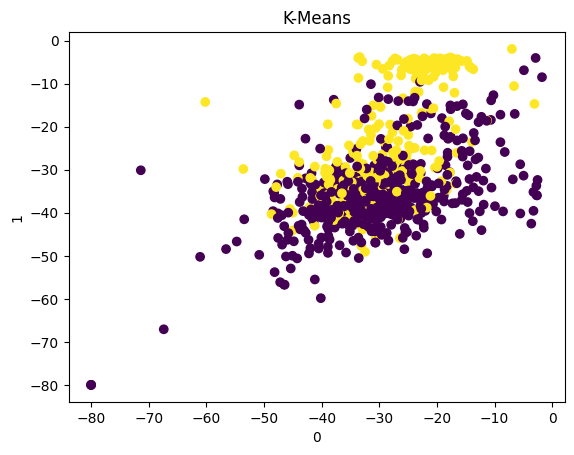

In [14]:
plt.scatter(test_df.loc[:, [0]], test_df.loc[:, [2]], c=k_means_labels)
plt.title('K-Means')
plt.xlabel(0)
plt.ylabel(1)
plt.show()

In [15]:
original_clusters_centers = [
    get_center(test_df.values[0:549]),
    get_center(test_df.values[549:])
]

In [16]:
compare_clusters_centers(original_clusters_centers, k_means.cluster_centers_)

[{'result_cluster': array([-29.989292, -30.352665, -35.186424, -40.29444 , -44.13058 ,
         -44.347153, -45.184673, -47.111954, -49.18144 , -50.981606,
         -52.518913, -52.94701 , -54.073105, -55.221035, -56.354652,
         -56.114883, -56.18381 , -56.618126, -57.25024 , -57.7884  ,
         -58.381542, -58.812813, -58.71782 , -58.713367, -58.92848 ,
         -59.23729 , -58.702213, -60.454544, -61.27367 , -60.977974,
         -62.86718 , -62.177612, -62.816105, -62.838116, -63.172295,
         -63.581676, -63.568184, -63.885834, -64.7292  , -64.912735,
         -65.20591 , -65.38834 , -65.16801 , -65.67579 , -65.64419 ,
         -66.0031  , -66.42506 , -66.771355, -66.80447 , -66.6508  ,
         -66.48707 , -66.58027 , -66.897026, -67.15891 , -67.59787 ,
         -67.249725, -66.83562 , -66.08813 , -65.27158 , -64.828735,
         -64.67379 , -64.194855, -63.67738 , -65.38378 ], dtype=float32),
  'closest_cluster': array([-32.430927, -30.792236, -34.372765, -36.83313 , -36.

### GMM

In [17]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(test_df)
gmm_labels = gmm.predict(test_df)

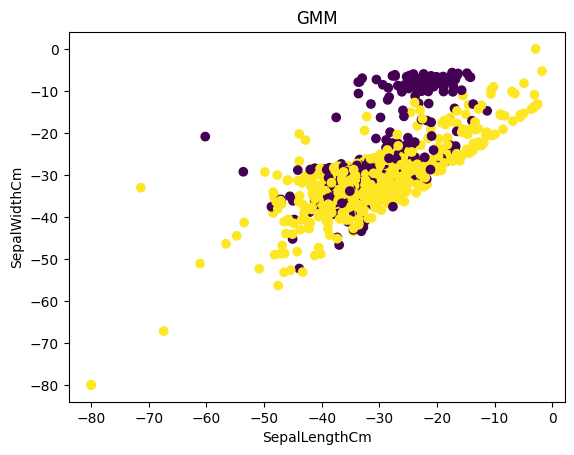

In [18]:
plt.scatter(test_df.loc[:, [0]], test_df.loc[:, [1]], c=gmm_labels)
plt.title('GMM')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [19]:
gmm_centers = get_clusters_centers(test_df.values, gmm_labels, 2)
compare_clusters_centers(original_clusters_centers, gmm_centers)

[{'result_cluster': array([-28.991098, -24.070719, -24.68282 , -24.569376, -20.52947 ,
         -17.880209, -17.537016, -19.145288, -23.36127 , -27.618912,
         -30.007648, -29.81638 , -30.119246, -28.994762, -30.656189,
         -31.921967, -32.966766, -33.741375, -34.11372 , -35.657673,
         -38.027195, -39.80691 , -40.4746  , -40.250183, -40.49725 ,
         -42.756603, -45.20103 , -48.38294 , -49.014404, -48.597916,
         -50.044285, -49.24303 , -50.25359 , -50.86268 , -49.934517,
         -48.769485, -48.7796  , -48.81114 , -48.158833, -47.67387 ,
         -47.656532, -47.423203, -46.975735, -47.091125, -46.41968 ,
         -46.107914, -47.57145 , -50.593258, -50.63756 , -49.99779 ,
         -49.77693 , -51.37228 , -53.84833 , -55.156487, -56.38446 ,
         -57.578957, -58.049133, -57.02482 , -56.81378 , -57.631107,
         -58.555717, -56.692585, -55.754616, -57.85706 ], dtype=float32),
  'closest_cluster': array([-25.53718 , -24.168083, -26.997494, -31.267023, -33.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_df)

In [21]:
from sklearn.manifold import TSNE

perplexity = 15
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_data = tsne.fit_transform(scaled_data)

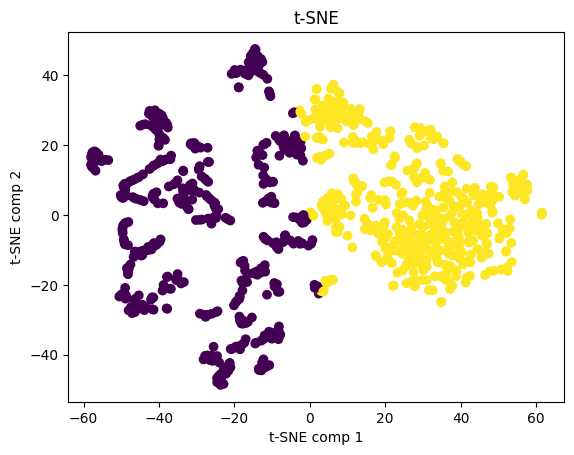

In [22]:
k_means_t_sne = KMeans(init="k-means++", n_init=15, n_clusters=2)
k_means_t_sne.fit(tsne_data)
t_sne_labels = k_means_t_sne.predict(tsne_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=t_sne_labels)
plt.title('t-SNE')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

In [23]:
k_means_t_sne_centers = get_clusters_centers(test_df.values, t_sne_labels, 2)
compare_clusters_centers(original_clusters_centers, k_means_t_sne_centers)

[{'result_cluster': array([-28.369389, -24.597183, -25.70346 , -26.08189 , -23.208834,
         -21.485474, -21.806362, -24.266567, -28.465975, -32.23067 ,
         -34.340927, -34.148884, -34.483315, -34.08966 , -36.063404,
         -37.10936 , -37.877537, -38.3662  , -38.686058, -39.96928 ,
         -42.039803, -43.577835, -43.90096 , -43.735474, -44.12471 ,
         -46.02397 , -47.82602 , -50.52053 , -51.31228 , -51.191105,
         -52.56269 , -51.6867  , -52.456707, -52.836018, -52.409134,
         -51.419636, -51.351173, -51.36206 , -51.072395, -50.620518,
         -50.61519 , -50.600834, -50.32482 , -50.796204, -50.130646,
         -49.994038, -51.142586, -53.665604, -53.68785 , -53.079365,
         -52.608982, -53.83199 , -55.773544, -56.863045, -58.0616  ,
         -58.645397, -58.72628 , -57.66632 , -56.962807, -57.1159  ,
         -57.72149 , -56.48718 , -55.361927, -57.09884 ], dtype=float32),
  'closest_cluster': array([-25.53718 , -24.168083, -26.997494, -31.267023, -33.

In [5]:
data = pd.read_csv('./crowd_small.csv')

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,label,emotion
0,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.00000,-80.000000,-80.000000,3,positive
1,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.00000,-80.000000,-80.000000,3,positive
2,-46.854893,-46.808994,-47.406044,-48.658010,-50.008830,-50.621418,-50.574000,-50.745340,-51.713352,-53.646950,...,-80.000000,-76.529560,-78.776700,-80.000000,-80.000000,-80.00000,-77.874850,-80.000000,3,positive
3,-38.429432,-33.945080,-37.908108,-45.604256,-54.972023,-56.971523,-48.762295,-45.745860,-46.414303,-49.324287,...,-68.921814,-63.948017,-64.375700,-67.393570,-72.559494,-72.64551,-69.476090,-71.330610,3,positive
4,-43.806060,-34.946583,-37.495686,-44.329890,-55.788532,-53.662148,-46.225708,-44.329150,-46.407078,-49.603504,...,-73.016660,-69.693436,-67.955246,-67.718890,-69.293320,-67.89613,-67.277020,-71.296770,3,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295209,-16.394790,-20.356672,-22.594025,-24.232178,-28.813390,-34.038498,-35.373997,-41.981224,-47.800064,-46.193962,...,-74.069840,-72.055680,-73.686330,-79.338520,-77.756830,-77.26226,-78.641800,-80.000000,2,neutral
2295210,-24.708437,-31.359835,-24.897755,-23.217749,-27.467913,-35.314290,-36.242600,-44.000980,-48.301880,-51.932728,...,-71.342090,-73.834310,-72.575120,-75.951096,-80.000000,-80.00000,-80.000000,-80.000000,2,neutral
2295211,-32.118183,-27.608562,-20.756977,-20.963146,-25.722208,-37.302130,-40.165813,-43.160275,-47.405580,-48.439434,...,-70.791180,-73.263176,-74.463066,-74.614050,-78.104280,-80.00000,-78.535710,-79.957756,2,neutral
2295212,-27.875586,-35.728317,-24.079720,-22.103657,-26.203863,-36.352238,-38.101160,-42.937020,-48.946564,-45.605843,...,-77.940810,-75.405136,-75.046005,-79.520490,-78.257454,-78.47765,-80.000000,-80.000000,2,neutral


In [7]:
positive_sad_data = data.loc[(data['emotion'].isin(['positive', 'sad']))]
features = positive_sad_data.iloc[:, 0:64]
labels = positive_sad_data.iloc[:, 64].values

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(features)

k_means = KMeans(init="k-means++", n_init=15, n_clusters=2)
k_means.fit(scaled_data)
k_means_labels = k_means.predict(scaled_data)

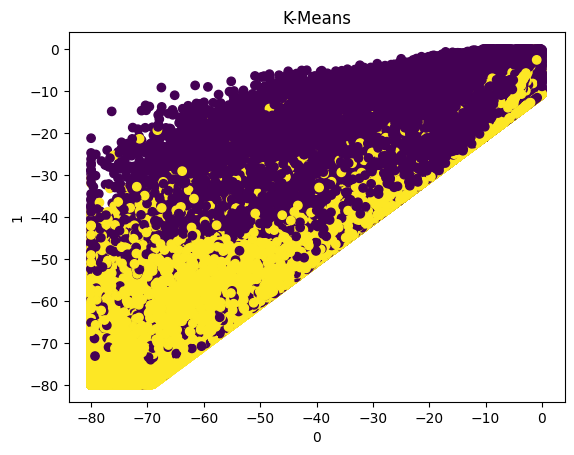

In [9]:
plt.scatter(features.loc[:, ['0']], features.loc[:, ['1']], c=k_means_labels)
plt.title('K-Means')
plt.xlabel(0)
plt.ylabel(1)
plt.show()

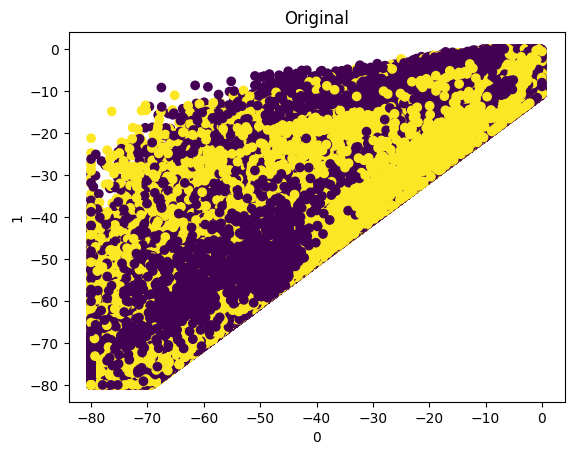

In [10]:
plt.scatter(features.loc[:, ['0']], features.loc[:, ['1']], c=labels)
plt.title('Original')
plt.xlabel(0)
plt.ylabel(1)
plt.show()

In [11]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df["label"] = pd.DataFrame(labels)
scaled_clusters_centers = scaled_df.groupby('label').mean().values

In [12]:
compare_results = compare_clusters_centers(scaled_clusters_centers, k_means.cluster_centers_)
compare_results

[{'result_cluster': array([0.51169769, 0.56029582, 0.62695236, 0.67813264, 0.6911258 ,
         0.67738668, 0.6527145 , 0.63400455, 0.62653313, 0.61610749,
         0.59864931, 0.57443943, 0.54510849, 0.5288491 , 0.51260912,
         0.51014916, 0.50301687, 0.49497098, 0.48588157, 0.47643125,
         0.46654706, 0.45674259, 0.44728903, 0.43827897, 0.42970735,
         0.4204979 , 0.4223002 , 0.40890649, 0.40131656, 0.41720295,
         0.40629726, 0.41383791, 0.40596503, 0.4040096 , 0.39124124,
         0.39992032, 0.39348478, 0.38337953, 0.39404062, 0.38387021,
         0.37850306, 0.37563572, 0.37536854, 0.37131979, 0.3645773 ,
         0.35451299, 0.35026086, 0.35913668, 0.35690461, 0.34309892,
         0.35244547, 0.34861283, 0.33555812, 0.3479675 , 0.33161356,
         0.31075257, 0.30249544, 0.30283304, 0.30582153, 0.30962142,
         0.3186477 , 0.32337223, 0.31594493, 0.27770197]),
  'closest_cluster': array([0.47867676, 0.49573058, 0.51084057, 0.52121188, 0.51362722,
       

In [13]:
get_clustering_accuracy(compare_results, 2)

0.08391108395468794

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

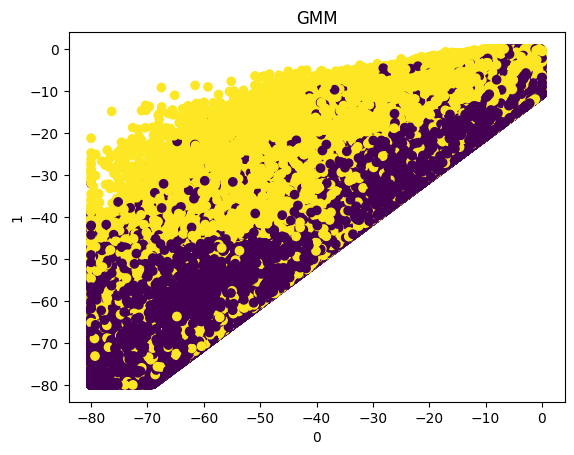

In [15]:
plt.scatter(features.loc[:, ['0']], features.loc[:, ['1']], c=gmm_labels)
plt.title('GMM')
plt.xlabel(0)
plt.ylabel(1)
plt.show()

In [18]:
gmm_centers = get_clusters_centers(scaled_data, gmm_labels, 2)
gmm_compare_results = compare_clusters_centers(scaled_clusters_centers, gmm_centers)
gmm_compare_results

[{'result_cluster': array([0.42805073, 0.42230814, 0.39537303, 0.37635687, 0.36055159,
         0.34685424, 0.3332909 , 0.31987803, 0.30768154, 0.29691111,
         0.28527272, 0.27266877, 0.2599944 , 0.25557232, 0.24594401,
         0.24579235, 0.24366812, 0.24157819, 0.23965653, 0.23706412,
         0.23333672, 0.22931344, 0.22484772, 0.22002541, 0.2149201 ,
         0.20909245, 0.21192744, 0.20194097, 0.19647253, 0.20596884,
         0.1931646 , 0.19959823, 0.19164586, 0.19040343, 0.18385231,
         0.18545181, 0.179156  , 0.17211701, 0.17298052, 0.16438905,
         0.15915873, 0.1553922 , 0.15345092, 0.15097288, 0.14959631,
         0.14772528, 0.14828633, 0.15281023, 0.14866411, 0.14079489,
         0.14201386, 0.13981612, 0.1344029 , 0.13909936, 0.13307238,
         0.12745937, 0.12670777, 0.12865858, 0.12994114, 0.13009161,
         0.13281016, 0.1331669 , 0.12550864, 0.0970381 ]),
  'closest_cluster': array([0.40608267, 0.42777043, 0.44646607, 0.46689399, 0.47292868,
       

In [19]:
get_clustering_accuracy(gmm_compare_results, 2)

0.24032310272610358